In [1]:
import utils.molecule_tools as mol
import utils.cs_vqe_tools as cs_tools
import cs_vqe_classes.cs_vqe_circuit as cs_circ
from qiskit.aqua.components.optimizers import (SLSQP, COBYLA, SPSA, AQGD, L_BFGS_B, P_BFGS,
                                                NELDER_MEAD, CG, ADAM, POWELL, TNC, GSLS,
                                                NFT, IMFIL, SNOBFIT)

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


In [2]:
atoms = ['He','H']
bond_len = 0.772 #BeH:1.342396
multiplicity = 1
charge = 1
basis = '3-21g'

molecule = mol.construct_molecule(atoms, bond_len, multiplicity, charge, basis)
speciesname = molecule['speciesname']
ham   = molecule['hamiltonian']
uccsd = molecule['uccsdansatz']
num_qubits = molecule['num_qubits']
num_electrons = molecule['num_electrons']

In [3]:
optimisers = [CG,COBYLA,GSLS,IMFIL,L_BFGS_B,NELDER_MEAD,NFT,POWELL,SNOBFIT,SLSQP,SPSA,TNC]

In [4]:
terms_noncon = cs_tools.greedy_dfs(ham, 3, criterion='weight')[-1]
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian=ham,
                                  terms_noncon=terms_noncon,
                                  num_qubits=num_qubits,
                                  num_electrons=num_electrons, 
                                  rot_A=True)

In [5]:
mol_circ.run_cs_vqe(max_sim_q=4, optimizer=IMFIL(maxiter=10000))
mol_circ.cs_vqe_results

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


*Performing 1-qubit CS-VQE over qubit positions 1


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
Reached CS-VQE target energy
 


{'rows': 2,
 'cols': 2,
 'grid_pos': [(0, 0), (0, 1), (1, 0), (1, 1)],
 'gs_noncon_energy': -3.142824749268165,
 'true_gs': -3.16676547725441,
 'num_qubits': 8,
 (0, 0): {'num_sim_q': 1,
  'result': -3.1428247492681627,
  'target': -3.142824749268163,
  'projected_target': -3.142824749268163,
  'A_expct': -0.9999999999999999,
  'counts': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42],
  'values': [-0.5718973898574926,
   -3.142824749268163,
   -3.142824749268163,
   -3.142824749268163,
   -3.142824749268163,
   -3.142824749268163,
   -3.142824749268163,
   -1.8573610696264078,
   -1.8573610696264078,
   -1.8573610694992475,
   -1.8573610694992484,
   -1.8573610694992484,
   -2.7663211544964397,
   -2.7663211544964397,
   -2.766321154406525,
   -2.7663211

In [6]:
#optimisers = [IMFIL, NFT, POWELL]
max_sim_q = 8
opt_results={}
for opt in optimisers:
    name_index = str(opt).rfind('.')
    opt_name = str(opt)[name_index+1:-2]
    print('Testing optimiser:', opt_name)
    mol_circ.run_cs_vqe(max_sim_q=max_sim_q, optimizer=opt(maxiter=10000))#, noise=True)
    cs_vqe_results = mol_circ.cs_vqe_results
    count_list = []
    value_list = []
    target_list = []
    for g in cs_vqe_results['grid_pos']:
        vqe_out = cs_vqe_results[g]
        n_q = vqe_out['num_sim_q']
        count_list.append(vqe_out['counts'][-1])
        value_list.append(vqe_out['result'])
        target_list.append(vqe_out['target'])

            
    opt_results[opt_name] = {'counts': count_list,
                             'values': value_list,
                             'target': target_list}

Testing optimiser: CG
*Performing 1-qubit CS-VQE over qubit positions 1
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 7, 5, 3, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 5, 3, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: COBYLA
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 7, 5, 3, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 5, 3, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: GSLS
*Performing 1-qubit CS-VQE over qubit positions 1


/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/gsls.py:245: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  normal_samples = aqua_globals.random.normal(size=(num_points, n))


 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 7, 5, 3, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 5, 3, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: IMFIL
*Performing 1-qubit CS-VQE over qubit positions 1
Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
Reached CS-VQE target energy
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 7, 5, 3, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 5, 3, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6

/home/tim/anaconda3/lib/python3.7/site-packages/SQSnobFit/_snobfit.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  request = numpy.vstack((request, numpy.concatenate((y1, numpy.array((f1, 3), ndmin=2)), axis=1)))


Reached CS-VQE target energy
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0


/home/tim/anaconda3/lib/python3.7/site-packages/SQSnobFit/_snobfit.py:472: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  request = numpy.vstack((request, numpy.concatenate((y1, numpy.array((f1, 2), ndmin=2)), axis=1)))


 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
 
*Performing 5-qubit CS-VQE over qubit positions 7, 5, 3, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 5, 3, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: SLSQP
*Performing 1-qubit CS-VQE over qubit positions 1
 
*Performing 2-qubit CS-VQE over qubit positions 1, 0
Reached CS-VQE target energy
 
*Performing 3-qubit CS-VQE over qubit positions 3, 1, 0
 
*Performing 4-qubit CS-VQE over qubit positions 7, 3, 1, 0
Reached CS-VQE target energy
 
*Performing 5-qubit CS-VQE over qubit positions 7, 5, 3, 1, 0
 
*Performing 6-qubit CS-VQE over qubit positions 7, 6, 5, 3, 1, 0
 
*Performing 7-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 1, 0
 
*Performing 8-qubit CS-VQE over qubit positions 7, 6, 5, 4, 3, 2, 1, 0
 
Testing optimiser: SPS

In [38]:
#import json 

#data={}
#for k in opt_results.keys():
#    data[k] = opt_results[k]
     
#with open("data/optimiser_comparison.json", "w") as outfile: 
#    json.dump(data, outfile)

with open('data/optimiser_comparison.json', 'r') as json_file:
    opt_results = json.load(json_file)

/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


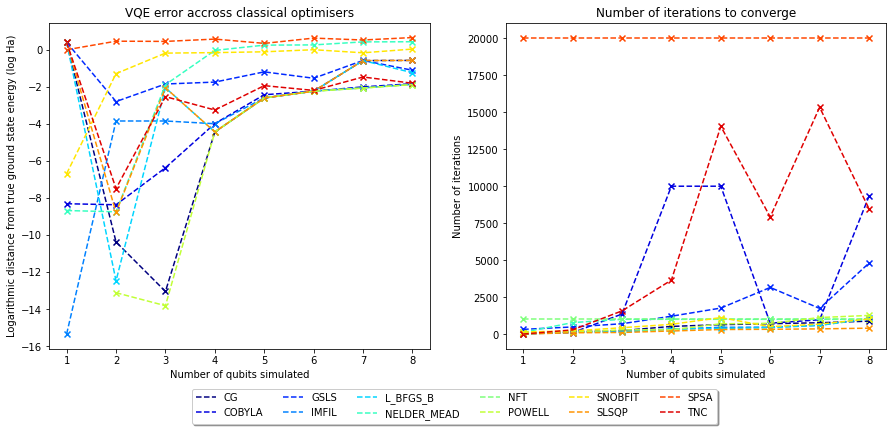

In [43]:
import numpy as np
X = list(range(1,max_sim_q+1))
from matplotlib import pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=1, figsize = (15, 6))
for index, opt in enumerate(opt_results.keys()):
    values = np.array(opt_results[opt]['values'])
    target = np.array(opt_results[opt]['target'])
    diff = list(np.log10(values-target))
    c = plt.cm.jet(index/len(optimisers))
    axs[0].scatter(X, diff, marker='x', color=c)
    axs[0].plot(X, diff, label=opt, ls='--', color=c)
    axs[0].set_xlabel('Number of qubits simulated')
    axs[0].set_ylabel('Logarithmic distance from true ground state energy (log Ha)')
    axs[0].set_title('VQE error accross classical optimisers')
    axs[0].set_xticks(X)
    counts = np.array(opt_results[opt]['counts'])
    axs[1].scatter(X, counts, marker='x', color=c)
    axs[1].plot(X, counts, ls='--', color=c)
    axs[1].set_xlabel('Number of qubits simulated')
    axs[1].set_ylabel('Number of iterations')
    axs[1].set_title('Number of iterations to converge')
    axs[1].set_xticks(X)

fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=6)

In [44]:
fig.savefig('plots/classical_optimiser_comparison.png', dpi=300, bbox_inches='tight')

In [14]:
opt_results

{'CG': {'counts': [4, 161, 240, 520, 640, 703, 770, 875],
  'values': [-0.5718973898574926,
   -3.151872881820948,
   -3.1518728818628774,
   -3.155280682256727,
   -3.156588997025081,
   -3.1532417060440916,
   -2.896356938042269,
   -2.896356938043667],
  'target': [-3.142824749268163,
   -3.1518728818629707,
   -3.151872881862966,
   -3.1553177976071196,
   -3.159114851913749,
   -3.159114851913758,
   -3.1619490056505173,
   -3.1667654772543976]},
 'COBYLA': {'counts': [41, 99, 1357, 10000, 10000, 739, 971, 9326],
  'values': [-3.1428247443870845,
   -3.151872877554863,
   -3.151872452669272,
   -3.1552130746424463,
   -3.1553357126430552,
   -3.1532416452609975,
   -3.1518758097912443,
   -3.1518745301336257],
  'target': [-3.142824749268163,
   -3.1518728818629715,
   -3.1518728818629707,
   -3.155317797607129,
   -3.1591148519137575,
   -3.159114851913753,
   -3.1619490056505137,
   -3.1667654772544203]},
 'GSLS': {'counts': [321, 484, 701, 1210, 1761, 3155, 1739, 4801],
  'valu